# organized version of things implemented in 20190605_data_exploration

In [8]:
import pandas as pd
import numpy as np
import loompy
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import matplotlib as mpl
import imp
import sys
sys.path.append('/home/bojk/Data/minimeta_pyfiles/')
import leidenalgorithm_implementation as li

# bob's dataset

In [5]:
metadata = pd.read_csv('metadata.csv',index_col=0)
tsne_coords  = pd.read_csv('Datasets/TuPaMetaDataDivya/tSNEcoordinates.csv',index_col=0)
meta_tSNE = metadata.join(tsne_coords)
meta_tSNE.head()

,nGene,nReads,orig.ident,Tumor,Plate,Well,S,percent.mito,percent.ERCC,percent.ribo,res.1,oldIdent,annotation,tSNE_1,tSNE_2
TuPa1_Plate2_B10_S000,3487,359151,TuPa1,TuPa1,Plate2,B10,S000,0.031750,0.054845,0.010291,11,11,Mesen1,16.024758,-4.296897
TuPa1_Plate2_G3_S000,3669,93115,TuPa1,TuPa1,Plate2,G3,S000,0.056586,0.048078,0.015218,11,11,Mesen1,16.758752,-5.378935
TuPa1_Plate2_C7_S000,3416,123935,TuPa1,TuPa1,Plate2,C7,S000,0.034445,0.039852,0.013297,11,11,Mesen1,16.047937,-4.953026
TuPa1_Plate2_H5_S000,2655,142586,TuPa1,TuPa1,Plate2,H5,S000,0.047985,0.085329,0.016390,11,11,Mesen1,15.600643,-4.512714
TuPa1_Plate2_B3_S000,2893,132529,TuPa1,TuPa1,Plate2,B3,S000,0.083461,0.085717,0.016479,11,11,Mesen1,15.184382,-4.821161


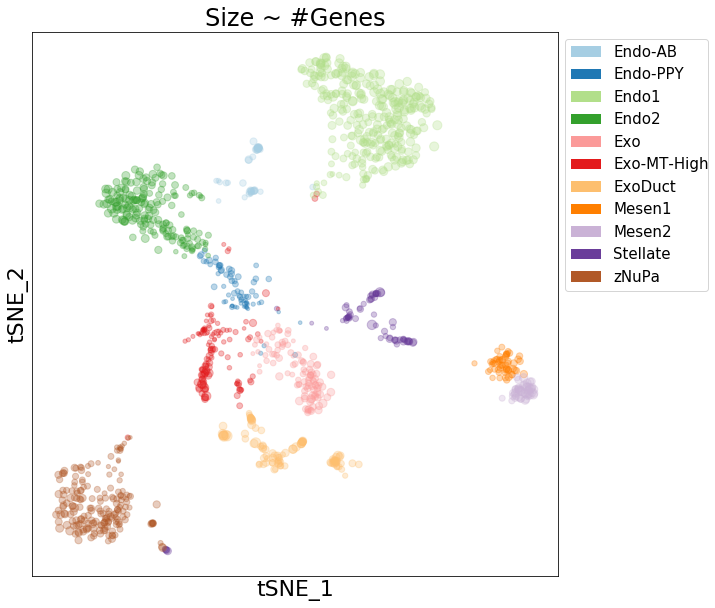

In [6]:
keys = np.sort(metadata.annotation.unique()); values = sns.color_palette('Paired',len(keys)+1)
lut = dict(zip(keys,values[:-2]+[values[-1]]))
colors = meta_tSNE.annotation.map(lut)

f = plt.figure()
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
tsne_coords.plot.scatter('tSNE_1','tSNE_2',figsize=(10,10),ax=ax,color=colors,s=meta_tSNE.nGene.divide(80),alpha=.3)#,label=colors.keys)
for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Size ~ #Genes')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.show()
#f.savefig('Datasets/TuPaMetaDataDivya/figures/tSNE_cellType_nGenes.png')

In [14]:
imp.reload(li)
count_path = 'Datasets/TuPaMetaDataDivya/CombinedCountTable.csv'
distMat = li.preprocessing(count_path,meta_tSNE)


----------------------------------------------------
Loaded counttable, started processing
Local time: 14:33
----------------------------------------------------


/home/bojk/Data/minimeta_pyfiles/leidenalgorithm_implementation.py:58: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normENS.drop(normENS[normENS.sum(axis=1).sort_values()==0].index,inplace=True)


----------------------------------------------------
Processing counttable and computing distance matrix took 124.65 seconds
Finished at local time: 14:36
----------------------------------------------------


----------------------------------------------------
Calculating 5 nearest neigbors for each cell
Local time: 15:10
----------------------------------------------------
----------------------------------------------------
Collected list of pairs, this took 2.12 seconds
Finished at local time: 15:10
----------------------------------------------------
----------------------------------------------------
Calculating new clusters from pairs with resolution parameter = 0.007
Local time: 15:10
----------------------------------------------------
----------------------------------------------------
Assigned 16 unique clusters in 0.21 seconds
Finished at local time: 15:10
----------------------------------------------------
----------------------------------------------------
Started plotting, saving to 'Datasets/TuPaMetaDataDivya/figures'
----------------------------------------------------


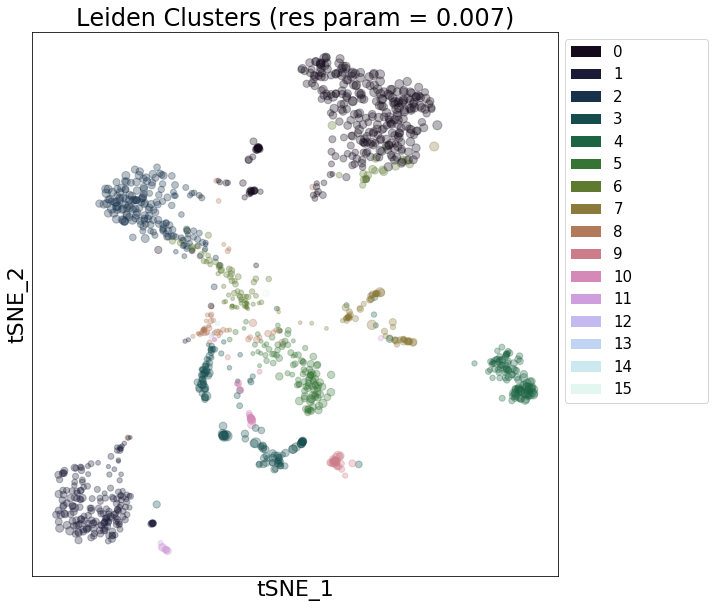

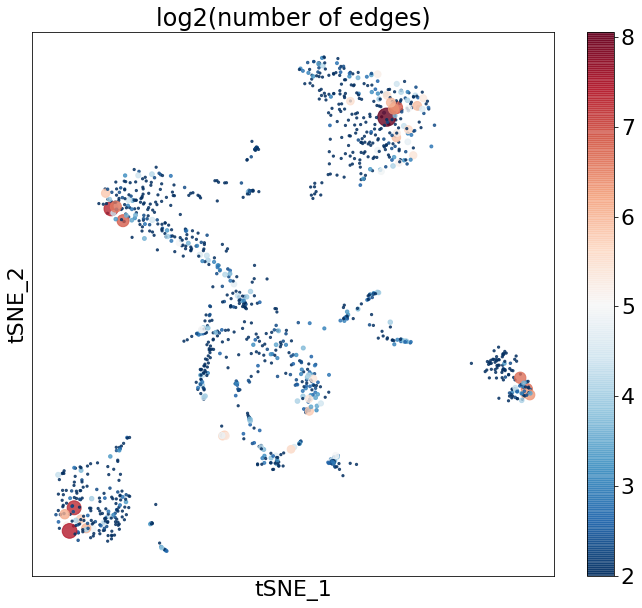

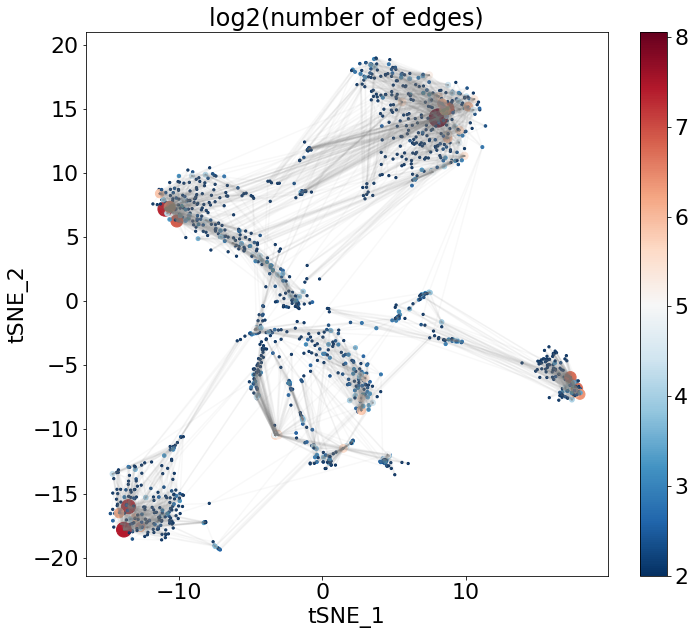

----------------------------------------------------
Finished at local time: 15:10
----------------------------------------------------


In [26]:
imp.reload(li)
savedir = 'Datasets/TuPaMetaDataDivya/figures'
res_param = .007
NN = 5
keys = ['k','resolution_parameter','save_dir']
values = [NN,res_param,savedir]
kwds = dict(zip(keys,values))
meta_tSNE,pairs = li.run_leiden_all(distMat,meta_tSNE,**kwds)

# spyros' data - brain atlas

In [ ]:
count_path = 'Datasets/Darmanis_Brain/All_cell_counts_brain.csv'

In [30]:
metadata = pd.read_csv('Datasets/Darmanis_Brain/All_cell_info_brain.csv',sep=';',index_col=0)
#tsne_coords  = pd.read_csv('Datasets/Darmanis_Brain/',index_col=0)
#meta_tSNE = metadata.join(tsne_coords)
metadata.head()

,sub_tissue,tissue,tissue_type,Cluster,Cluster_color,Cell_type,Neuronal_community
Cell_name,,,,,,,
1772078217.C32,cortex,brain,adult_healthy,4,#FFBB78,Astrocytes,NaN
1772078236.C17,cortex,brain,adult_healthy,4,#FFBB78,Astrocytes,NaN
1772078236.C30,cortex,brain,adult_healthy,4,#FFBB78,Astrocytes,NaN
1772078237.C11,cortex,brain,adult_healthy,4,#FFBB78,Astrocytes,NaN
1772078237.C19,cortex,brain,adult_healthy,4,#FFBB78,Astrocytes,NaN


In [36]:
metadata.Cell_type.value_counts()

Neurons              131
Fetal_quiescent      110
Astrocytes            62
Oligodendrocytes      38
Fetal_replicating     25
hybrid                24
hybrids               22
Endothelial           20
OPC                   18
Microglia             16
Name: Cell_type, dtype: int64

In [35]:
list(metadata.tissue_type.unique())
#list(metadata.tissue.unique())

['adult_healthy', 'fetal']

In [170]:
imp.reload(li)
count_path = 'Datasets/Darmanis_Brain/All_cell_counts_brain.csv'
counttable = pd.read_csv(count_path,index_col=0)
counttableNorm = counttable.divide(counttable.sum())
dist_Mat = li.preprocessing_normCounttab(counttableNorm)

----------------------------------------------------
Started processing counttable
Local time: 17:23
----------------------------------------------------


/home/bojk/Data/minimeta_pyfiles/leidenalgorithm_implementation.py:83: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normENS.drop(normENS[normENS.sum(axis=1).sort_values()==0].index,inplace=True)


----------------------------------------------------
Processing counttable and computing distance matrix took 6.65 seconds
Finished at local time: 17:24
----------------------------------------------------


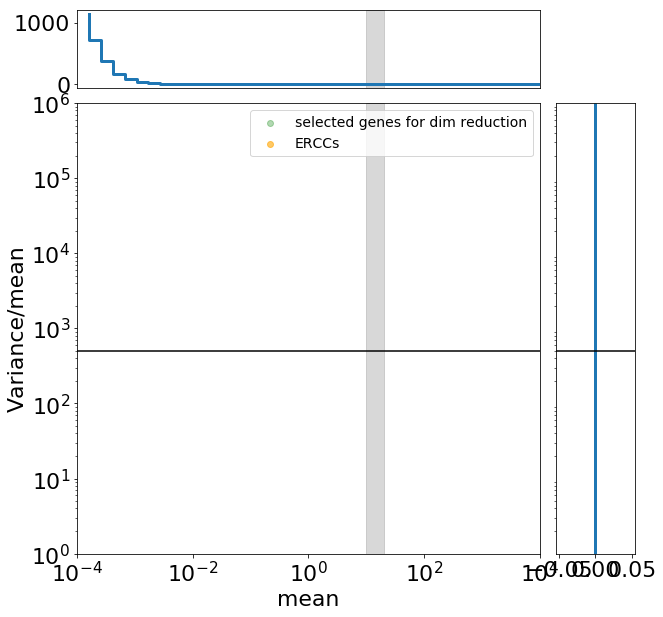

In [59]:
#counttableNorm[counttableNorm.index.str.contains('ERCC')].T.sort_values('BIVM-ERCC5')
imp.reload(li)
gene_list = li.plot_fano(counttableNorm,'Datasets/Darmanis_Brain')

In [332]:
counttableNorm.describe()

,1772078217.C03,1772078217.C04,1772078217.C06,1772078217.C07,1772078217.C08,1772078217.C09,1772078217.C14,1772078217.C16,1772078217.C17,1772078217.C18,...,nochipID4.C62,nochipID4.C63,nochipID4.C66,nochipID4.C74,nochipID4.C77,nochipID4.C78,nochipID4.C84,nochipID4.C89,nochipID4.C95,nochipID4.C96
count,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,...,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000
mean,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,...,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045
std,0.000440,0.000262,0.000460,0.000346,0.000419,0.000357,0.000387,0.000455,0.000289,0.000513,...,0.000339,0.000296,0.000432,0.000363,0.000405,0.000358,0.000343,0.000434,0.000380,0.000400
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.041295,0.016881,0.037287,0.036331,0.052212,0.024139,0.035881,0.057279,0.021678,0.050058,...,0.020073,0.021964,0.018307,0.020747,0.032099,0.032913,0.026959,0.024467,0.035984,0.023563


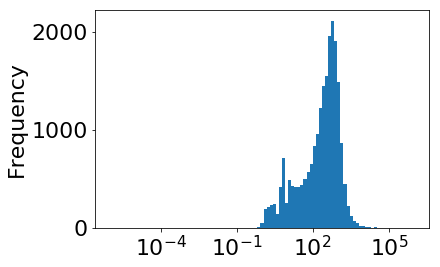

In [68]:
bins = np.logspace(-6,6,100)
yax = counttableNorm.T.var().divide(counttableNorm.T.mean())
xax = counttableNorm.T.mean()
yax.multiply(1e6).plot.hist(bins=bins)
plt.xscale('log')

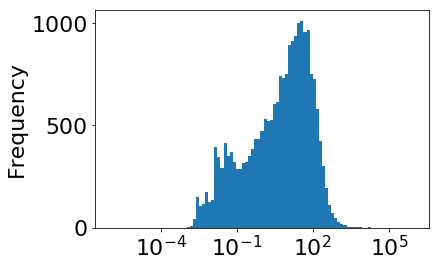

In [71]:
xax.multiply(1e6).plot.hist(bins=bins)
plt.xscale('log')

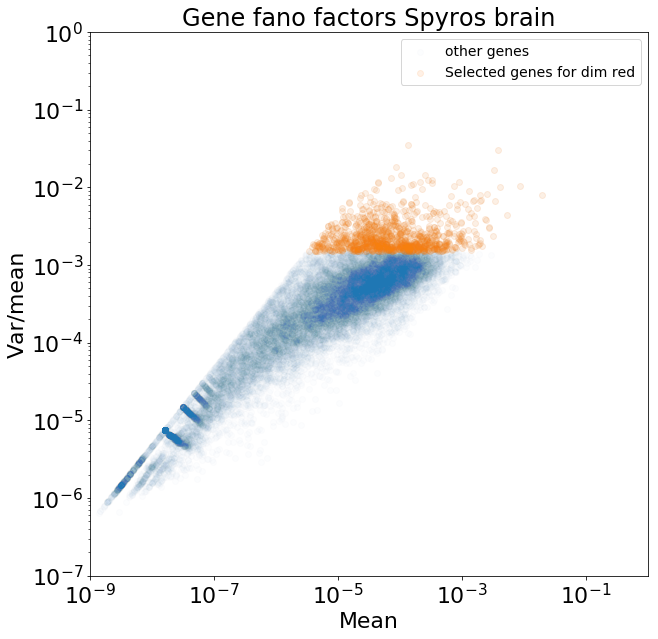

In [162]:
f = plt.figure(figsize=(10,10))
plt.scatter(xax,yax,alpha=.01,label='other genes')
plt.scatter(xax.loc[yax[yax>=1.5e-3].index],yax[yax>=1.5e-3],alpha=.1,label='Selected genes for dim red')
plt.legend()
plt.xscale('log');plt.yscale('log')
plt.title('Gene fano factors Spyros brain')
plt.ylabel('Var/mean');plt.xlabel('Mean')
plt.xlim(1e-9,1)
plt.ylim(1e-7,1)
f.savefig('Datasets/Darmanis_Brain/fano_based_selection.png')

In [88]:
print(len(yax[yax>=1.5e-3]))
idx = yax[yax>=1.5e-3].index

1121


In [264]:
x

array([[-0.23440122, -0.29587545,  0.52020905, ..., -0.12682638,
        -0.18934086, -0.35935245],
       [-0.20364799, -0.48988376, -0.05670842, ..., -0.09621936,
        -0.18934086, -0.35007872],
       [-0.2324894 , -0.48841452, -0.47019533, ..., -0.12682638,
        -0.18934086, -0.19458911],
       ...,
       [-0.23440122, -0.48988376, -0.48645501, ..., -0.12682638,
        -0.18934086, -0.36501881],
       [-0.23440122, -0.48988376,  0.20656897, ..., -0.12682638,
        -0.18934086, -0.34815575],
       [-0.23440122, -0.48988376, -0.48645501, ..., -0.12682638,
        -0.18934086, -0.24877299]])

In [269]:


log2 = np.log2(counttableNorm.loc[idx]+.1)
log2.dropna(how='all',axis=1,inplace=True)

x = StandardScaler().fit_transform(log2.T)
pca = PCA(n_components=30)
principalComp = pca.fit_transform(x)
princdf = pd.DataFrame(principalComp)
princdf.index =log2.T.index

In [277]:
#pd.DataFrame(x).var()
#princdf

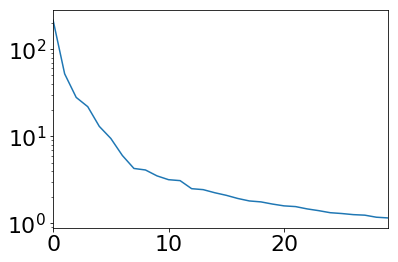

In [268]:
princdf.var().plot()
plt.yscale('log')

In [280]:
    x_emb = TSNE(n_components=2,perplexity=30).fit_transform(princdf.values)
    tsnedf = pd.DataFrame(x_emb,index=princdf.index)

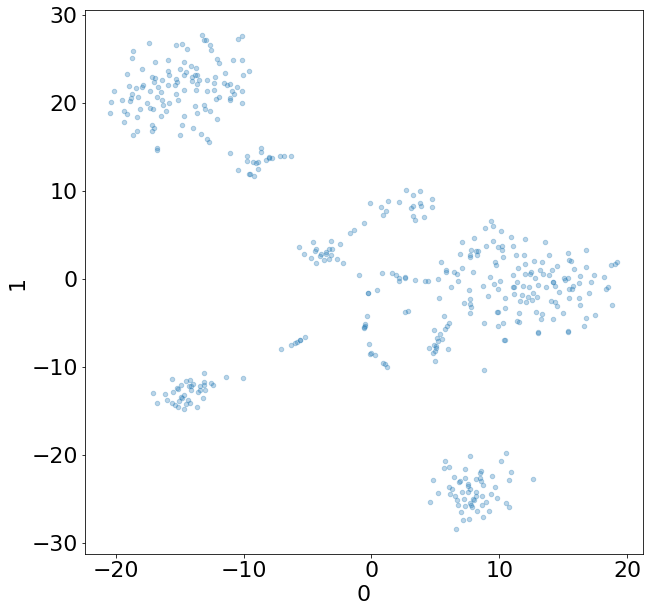

In [281]:
f,ax = plt.subplots(figsize=(10,10))
tsnedf.plot.scatter(0,1,alpha=.3,ax=ax)

In [282]:
#metadata
metadata['tsne_x'] = tsnedf.loc[metadata.index,0]
metadata['tsne_y'] = tsnedf.loc[metadata.index,1]

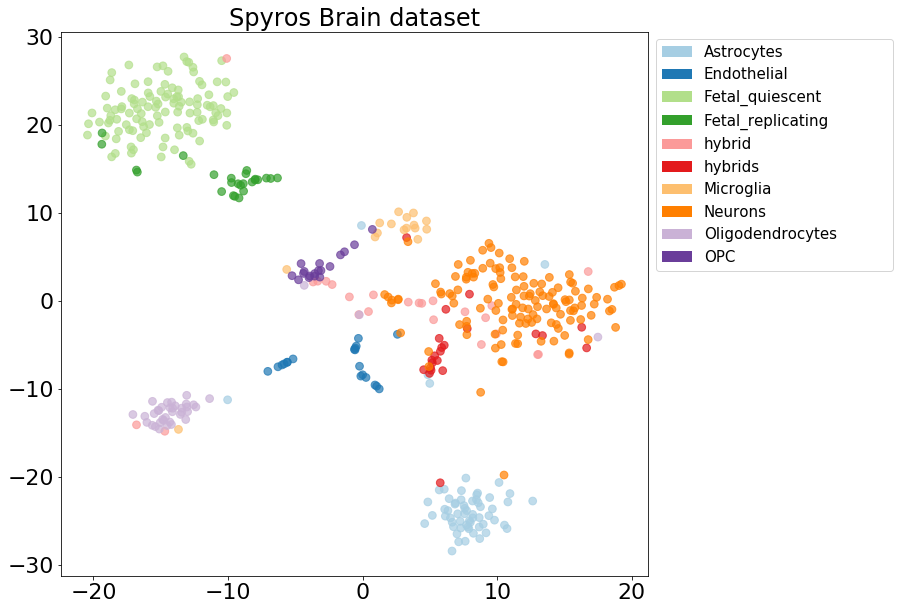

In [283]:
keys = metadata.Cell_type.unique(); values = sns.color_palette('Paired',len(keys))
lut = dict(zip(keys,values))
colors = metadata.Cell_type.map(lut)
f,ax = plt.subplots(figsize=(12,10))

ax.scatter(metadata['tsne_x'],metadata['tsne_y'],s=60,alpha=.7,color=colors)
for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles[1:],labels[1:],bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('Spyros Brain dataset')
plt.gcf().subplots_adjust(left=.1,right=0.78)
f.savefig('Datasets/Darmanis_Brain/tSNE_annotation_original.png')

In [139]:
metadata.head()

,sub_tissue,tissue,tissue_type,Cluster,Cluster_color,Cell_type,Neuronal_community,tsne_x,tsne_y
Cell_name,,,,,,,,,
1772078217.C32,cortex,brain,adult_healthy,4,#FFBB78,Astrocytes,NaN,22.902313,-1.054558
1772078236.C17,cortex,brain,adult_healthy,4,#FFBB78,Astrocytes,NaN,29.928764,-2.466921
1772078236.C30,cortex,brain,adult_healthy,4,#FFBB78,Astrocytes,NaN,28.413996,-4.150239
1772078237.C11,cortex,brain,adult_healthy,4,#FFBB78,Astrocytes,NaN,31.098927,-3.366530
1772078237.C19,cortex,brain,adult_healthy,4,#FFBB78,Astrocytes,NaN,32.610836,-0.604986


----------------------------------------------------
Calculating 5 nearest neigbors for each cell
Local time: 17:34
----------------------------------------------------
----------------------------------------------------
Collected list of pairs, this took 0.72 seconds
Finished at local time: 17:34
----------------------------------------------------
----------------------------------------------------
Calculating new clusters from pairs with resolution parameter = 0.01
Local time: 17:34
----------------------------------------------------
----------------------------------------------------
Assigned 10 unique clusters in 0.04 seconds
Finished at local time: 17:34
----------------------------------------------------
----------------------------------------------------
Started plotting, saving to 'Datasets/Darmanis_Brain'
----------------------------------------------------


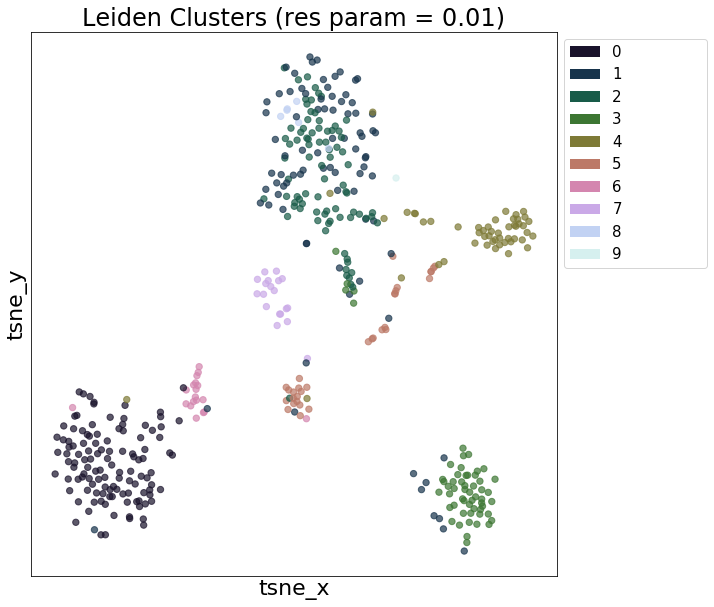

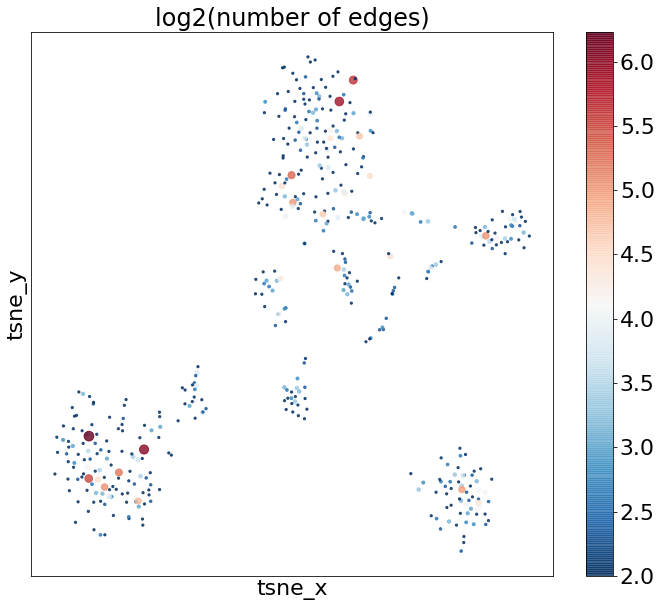

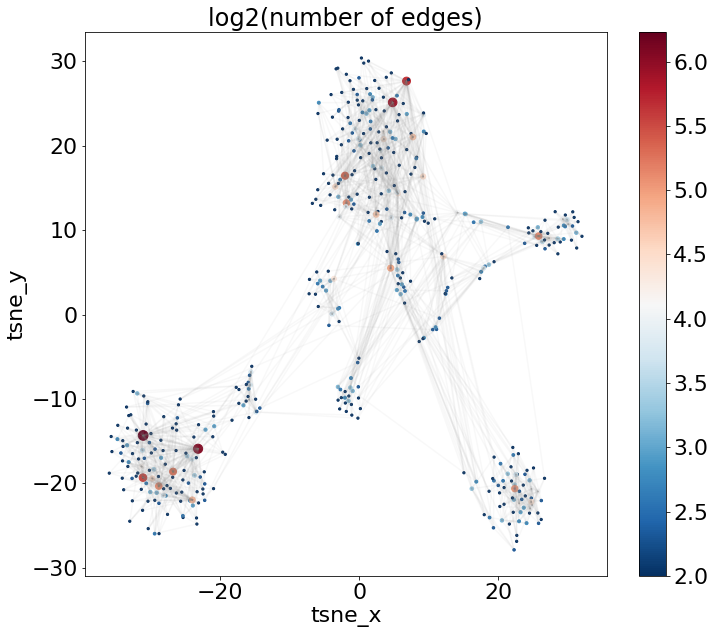

----------------------------------------------------
Finished at local time: 17:34
----------------------------------------------------


In [182]:
imp.reload(li)
savedir = 'Datasets/Darmanis_Brain'
res_param = .01
NN = 5
keys = ['k','resolution_parameter','save_dir','annot_col','tsnex','tsney']
values = [NN,res_param,savedir,'Cell_type','tsne_x','tsne_y']
kwds = dict(zip(keys,values))
meta_tSNE,pairs = li.run_leiden_all(dist_Mat,metadata,**kwds)

# Spyros glioblastoma

In [193]:
GBMcount_path = 'Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GBM_normalized_gene_counts.csv'
GBMmeta = pd.read_csv('Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GBM_metadata.csv',sep=' ',index_col=0)
GBMtsne = pd.read_csv('Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GBM_TSNE.csv',sep=' ',index_col=0)
GBMmeta = GBMmeta.join(GBMtsne)

In [227]:
GBMmeta2= pd.read_csv('Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GEO_upload/spyros.darmanis_metadata_GBM.csv',index_col=0)
GBMmeta = GBMmeta.join(GBMmeta2['characteristics: cell type'])

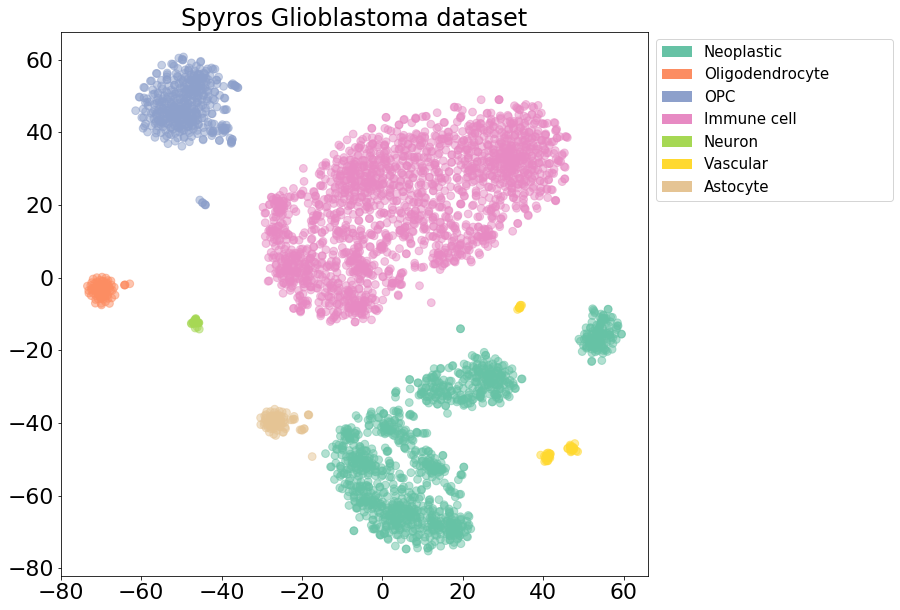

In [266]:

col = 'Sample.name'
col = 'Location'

col = 'Cluster_2d'
col = 'Selection'
col  = 'characteristics: cell type'


keys = GBMmeta[col].unique(); values = sns.color_palette('Set2',len(keys))
lut = dict(zip(keys,values))
colors = GBMmeta[col].map(lut)
f,ax = plt.subplots(figsize=(12,10))

ax.scatter(GBMmeta['Dim1'],GBMmeta['Dim2'],s=60,alpha=.5,color=colors)
for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles[1:],labels[1:],bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('Spyros Glioblastoma dataset')
plt.gcf().subplots_adjust(left=.1,right=0.78)
f.savefig('Datasets/Darmanis_Glioblastoma/GBM_tSNE_'+ col+'_annotation_original.png')

In [210]:
GBMmeta.iloc[0]
GBMmeta.Selection.unique()
GBMmeta['Sample.name'].unique()

array(['BT_S2', 'BT_S1', 'BT_S4', 'BT_S6'], dtype=object)

In [287]:
# compute cluster average expression, cell count, ...
GBMcountNorm = pd.read_csv(GBMcount_path,sep=' ',index_col=0)

In [289]:
GBMdist_Mat = li.preprocessing_normCounttab(GBMcountNorm)

----------------------------------------------------
Started processing counttable
Local time: 19:2
----------------------------------------------------


/home/bojk/Data/minimeta_pyfiles/leidenalgorithm_implementation.py:83: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  normENS.drop(normENS[normENS.sum(axis=1).sort_values()==0].index,inplace=True)


----------------------------------------------------
Processing counttable and computing distance matrix took 375.81 seconds
Finished at local time: 19:8
----------------------------------------------------


----------------------------------------------------
Calculating 5 nearest neigbors for each cell
Local time: 12:2
----------------------------------------------------
----------------------------------------------------
Collected list of pairs, this took 7.31 seconds
Finished at local time: 12:3
----------------------------------------------------
----------------------------------------------------
Calculating new clusters from pairs with resolution parameter = 0.0001
Local time: 12:3
----------------------------------------------------
----------------------------------------------------
Assigned 49 unique clusters in 1.70 seconds
Finished at local time: 12:3
----------------------------------------------------
----------------------------------------------------
Started plotting, saving to 'Datasets/Darmanis_Glioblastoma'
----------------------------------------------------


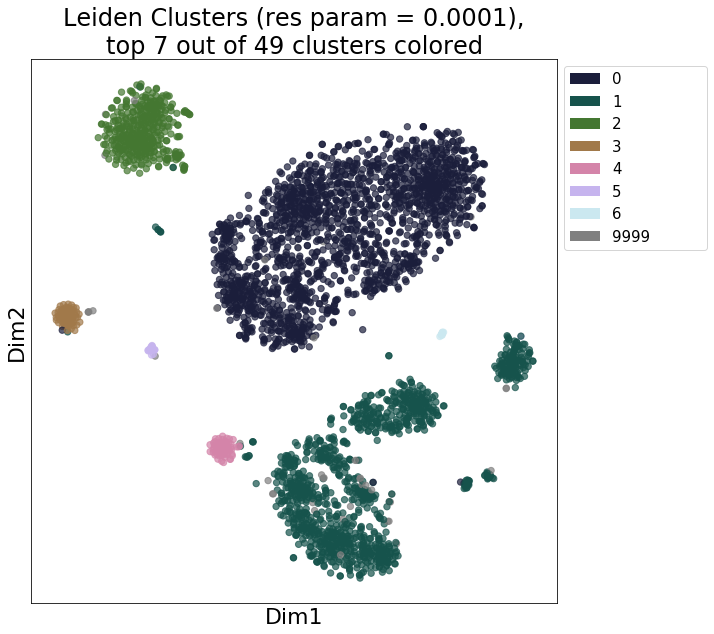

----------------------------------------------------
Finished at local time: 12:3
----------------------------------------------------


In [306]:
imp.reload(li)
savedir = 'Datasets/Darmanis_Glioblastoma'
res_param = .0001
NN = 5
keys = ['k','resolution_parameter','save_dir','annot_col','tsnex','tsney','plotEdges','color_subset_only','num_of_colors']
values = [NN,res_param,savedir,'characteristics: cell type','Dim1','Dim2',False,True,7]
kwds = dict(zip(keys,values))
meta_tSNE,pairs = li.run_leiden_all(GBMdist_Mat,GBMmeta,**kwds)

In [305]:
meta_tSNE.new_clusters.value_counts()

0     1844
1     1118
2      397
3       79
4       77
5       21
6       11
28       1
40       1
38       1
36       1
34       1
32       1
30       1
24       1
26       1
44       1
22       1
20       1
18       1
16       1
14       1
12       1
10       1
8        1
42       1
47       1
46       1
45       1
43       1
41       1
39       1
37       1
35       1
33       1
31       1
29       1
27       1
25       1
23       1
21       1
19       1
17       1
15       1
13       1
11       1
9        1
7        1
48       1
Name: new_clusters, dtype: int64

In [314]:
GBMmeta#.groupby('characteristics: cell type').mean()

,Sample.type,Selection,Location,Sample.name,Total_reads,Unique_reads,Unique_reads_percent,Splice_sites_total,Splice_sites_Annotated,Splice_sites_GT.AG,...,Cluster_2d,Cluster_2d_color,Dim1,Dim2,characteristics: cell type,cellID,betweenness,degree,new_clusters,subset_color
1001000173.G8,Glioblastoma,Unpanned,Tumor,BT_S2,1741039,1400382,80.43,126660,122397,125741,...,11,#8C564B,19.555715,-66.420423,Neoplastic,0,52.915500,5,1,1
1001000173.D4,Glioblastoma,Unpanned,Tumor,BT_S2,1229919,1081271,87.91,106857,103763,105878,...,2,#AEC7E8,-66.467768,-4.840194,Oligodendrocyte,1,5338.749751,4,3,3
1001000173.B4,Glioblastoma,Unpanned,Tumor,BT_S2,1483293,1301500,87.74,539234,531827,536121,...,11,#8C564B,8.197811,-63.763646,Neoplastic,0,58604.382163,107,1,1
1001000173.A2,Glioblastoma,Unpanned,Tumor,BT_S2,1943210,1678256,86.37,469261,457505,465354,...,11,#8C564B,-6.468824,-51.283635,Neoplastic,0,8.772016,4,1,1
1001000173.E2,Glioblastoma,Unpanned,Tumor,BT_S2,1968898,1656225,84.12,204141,195729,202753,...,11,#8C564B,-9.436247,-53.896430,Neoplastic,0,211.087856,4,1,1
1001000173.F6,Glioblastoma,Unpanned,Tumor,BT_S2,1951103,1576660,80.81,185402,178030,184059,...,11,#8C564B,-9.937541,-58.177118,Neoplastic,0,799.466378,4,1,1
1001000173.B12,Glioblastoma,Unpanned,Tumor,BT_S2,1752673,1547420,88.29,697687,688409,693519,...,11,#8C564B,16.746660,-71.034181,Neoplastic,0,11918.471990,30,1,1
1001000173.D6,Glioblastoma,Unpanned,Tumor,BT_S2,1969682,1629384,82.72,375436,366956,372822,...,9,#9467BD,-37.511110,37.406128,OPC,2,10953.408162,8,2,2
1001000173.H1,Glioblastoma,Unpanned,Tumor,BT_S2,1637555,1361232,83.13,272462,265406,267652,...,11,#8C564B,-0.217017,-52.338028,Neoplastic,0,3646.804988,8,1,1
1001000173.E4,Glioblastoma,Unpanned,Tumor,BT_S2,2127631,1803304,84.76,621093,601658,616247,...,11,#8C564B,18.883817,-70.713328,Neoplastic,0,3.001059,4,1,1


In [329]:
GBMsum = pd.DataFrame(index=GBMmeta['characteristics: cell type'].unique(),columns=['mean_exp','num_cells'])
GBMcountmean = pd.DataFrame(index=GBMcountNorm.index,columns=GBMsum.index)
GBMcountfrac = GBMcountmean.copy()
for celltype in GBMsum.index:
    cells = GBMmeta[GBMmeta['characteristics: cell type']==celltype].index
    GBMcountmean[celltype] = GBMcountNorm[cells].mean(axis=1)
    GBMcountfrac[celltype] = (GBMcountNorm[cells] == 0).astype(int).sum(axis=1).divide(len(cells))

In [344]:
GBMcountmean.sort_values('OPC',ascending=False)
GBMcountfrac.sort_values('OPC')

,Neoplastic,Oligodendrocyte,OPC,Immune cell,Neuron,Vascular,Astocyte
ACTB,0.001833,0.000000,0.000000,0.002166,0.000000,0.000000,0.000000
MALAT1,0.023831,0.023529,0.000000,0.001624,0.000000,0.019608,0.045455
PTPRZ1,0.092576,0.964706,0.004926,0.977802,0.809524,0.960784,0.045455
FTH1,0.013749,0.011765,0.004926,0.001624,0.000000,0.000000,0.022727
GAPDH,0.012832,0.070588,0.007389,0.055225,0.000000,0.019608,0.000000
UBB,0.090742,0.058824,0.012315,0.166757,0.047619,0.019608,0.068182
APOD,0.928506,0.058824,0.014778,0.982133,0.952381,0.450980,0.988636
EEF1A1,0.021998,0.094118,0.014778,0.007038,0.095238,0.039216,0.079545
MARCKS,0.164070,0.929412,0.017241,0.118571,0.380952,0.294118,0.272727
DBI,0.065078,0.141176,0.017241,0.167298,0.666667,0.254902,0.079545


In [337]:
len(set(GBMcountmean.index))#.(set(counttableNorm.index)))

23368

In [338]:
GBMcountmean

,Neoplastic,Oligodendrocyte,OPC,Immune cell,Neuron,Vascular,Astocyte
1/2-SBSRNA4,0.197744,0.159815,0.165875,0.053056,0.862154,0.221750,0.159288
A1BG,1.369603,1.809653,0.042069,0.719386,1.936178,0.983218,0.061896
A1BG-AS1,0.238385,0.072781,0.004312,0.050604,0.526419,0.109578,0.000000
A1CF,0.026941,0.066601,0.027530,0.003791,0.000000,0.000000,0.000000
A2LD1,0.141228,0.000000,0.064615,0.128563,0.000000,0.413449,0.322428
A2M,1.187716,0.309224,0.700614,9.120060,0.566123,8.068826,0.064202
A2ML1,0.315865,0.000000,0.125625,0.031299,0.611079,0.000000,1.046748
A2MP1,0.043645,0.000000,0.013898,0.059295,0.000000,0.000000,0.000000
A4GALT,0.008463,0.000000,0.016808,0.005856,0.000000,1.120191,0.000000
A4GNT,0.019502,0.000000,0.006553,0.004081,0.000000,0.000000,0.071057


In [318]:
GBMcountNorm[['1001000173.G8','1001000173.D4','1001000173.B4']].mean(axis=1)

1/2-SBSRNA4    0.743998
A1BG           0.000000
A1BG-AS1       0.000000
A1CF           0.000000
A2LD1          0.000000
A2M            0.000000
A2ML1          0.000000
A2MP1          0.000000
A4GALT         0.000000
A4GNT          0.000000
AA06           0.000000
AAA1           0.000000
AAAS           0.000000
AACS           0.000000
AACSP1         0.000000
AADAC          0.000000
AADACL2        0.000000
AADACL3        0.000000
AADACL4        0.000000
AADAT          0.000000
AAGAB          5.243600
AAK1           1.582906
AAMP           2.601812
AANAT          0.000000
AARS           4.984821
AARS2          2.974359
AARSD1         0.000000
AASDH          0.000000
AASDHPPT       1.980737
AASS           1.675869
                 ...   
ZSCAN2         0.000000
ZSCAN20        0.000000
ZSCAN21        2.173110
ZSCAN22        1.885969
ZSCAN23        0.000000
ZSCAN29        0.000000
ZSCAN30        0.415916
ZSCAN4         0.000000
ZSCAN5A        0.000000
ZSCAN5B        0.000000
ZSWIM1         0

In [339]:
counttableNorm

,1772078217.C03,1772078217.C04,1772078217.C06,1772078217.C07,1772078217.C08,1772078217.C09,1772078217.C14,1772078217.C16,1772078217.C17,1772078217.C18,...,nochipID4.C62,nochipID4.C63,nochipID4.C66,nochipID4.C74,nochipID4.C77,nochipID4.C78,nochipID4.C84,nochipID4.C89,nochipID4.C95,nochipID4.C96
1/2-SBSRNA4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A1BG-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2LD1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,0.000000,0.000029,0.000002,0.000000,0.000003,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000510,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2ML1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2MP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,...,0.000000,0.000957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4GALT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4GNT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [340]:
import semiannotate as sa

In [343]:
sa = SemiAnnotate(
        matrix,
        sizes=sizes,
        n_fixed=Na,
        n_neighbors=5,
        n_pcs=20,
        distance_metric='correlation',
        threshold_neighborhood=0.8,
        )
sa()

NameError: name 'matrix' is not defined

# get counttables both, normalize identically 
# (to uniquely mapping genes)
#   + feature select 
# produce mean for atlas 
# get counts (number of cells for each)
# run algo

In [345]:
GBMcount_path

'Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GBM_normalized_gene_counts.csv'